<a href="https://colab.research.google.com/github/vs1161/Restaurant_Review/blob/main/Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/drive/MyDrive/ML_data/Restaurant reviews.csv')

In [65]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


In [66]:
df.info()

new_df = df[['Review', 'Rating']]
new_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [67]:
new_df['Rating'].dtype

dtype('O')

In [68]:
new_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [69]:
new_df['Rating'].isnull().sum()

38

In [70]:
y = new_df['Rating']
x = new_df['Review']

In [71]:
y = y.replace({'Like':3})



In [72]:
print(x.shape)

print(y.shape)



(10000,)
(10000,)


In [73]:
y = y.astype(float)

y

y.isnull().sum()


38

(9962,)
mean: 3.6009837382051795
median: 4.0
mode: 0    5.0
Name: Rating, dtype: float64


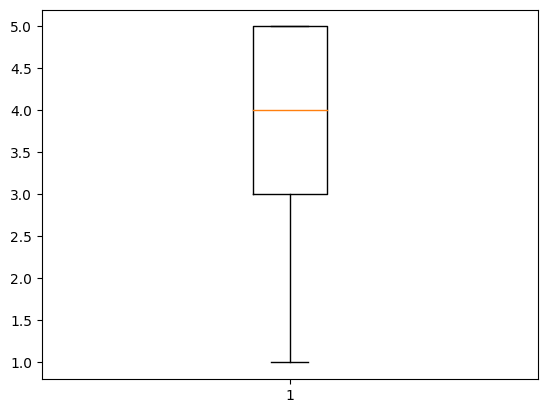

In [74]:
# Detecting outliers

y.to_list()
y_notnull = y.dropna()
print(y_notnull.shape)
plt.boxplot(y_notnull)

print('mean:' , y_notnull.mean())
print('median:' , y_notnull.median())
print('mode:', y_notnull.mode())


In [75]:
# there are no outilers present therefore replacing the null values with the mean of distribution
y = y.fillna(y_notnull.mean())
y.isnull().sum()

for i in range(len(y)):
    if (y[i]>= 3):
        y[i] = 1
    else:
        y[i] = 0

y= y.astype(int)
y.unique()

new_df['Review'] = x
new_df['Rating'] = y
df=new_df

df

<ipython-input-75-1541e0cafd37>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Review'] = x
<ipython-input-75-1541e0cafd37>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rating'] = y


,Review,Rating
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1
2,A must try.. great food great ambience. Thnx f...,1
3,Soumen das and Arun was a great guy. Only beca...,1
4,Food is good.we ordered Kodi drumsticks and ba...,1
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,1
9996,This place has never disappointed us.. The foo...,1
9997,"Bad rating is mainly because of ""Chicken Bone ...",0
9998,I personally love and prefer Chinese Food. Had...,1


In [76]:
## NLP PROCESS
import re
import nltk
from nltk.corpus import stopwords

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus= []
len(df)

for i in range(len(df)) :
    review = re.sub('[^a-zA-Z]',' ', str(df['Review'][i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

corpus

['ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen da realli courteou help',
 'ambienc good pleasant even servic prompt food good good experi soumen da kudo servic',
 'must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz',
 'soumen da arun great guy behavior sincereti good food cours would like visit place',
 'food good order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good',
 'ambianc good servic good food apradeecp subro best servic food good papiya good hostess ur caption good star restaur',
 'nice place ambienc differ food order tasti servic also gud worth visit reason well realli must visit place',
 'well read mani review final visit place ambienc good come food crispi corn nice tawa fish ok basket biryani disappoint us biryani ok flatter claim staff polit prompt especi pradeep suman',
 'excel food 

In [79]:
## Tokenization  Bag Of Words And TF-IDF

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#cv = CountVectorizer(max_features= 1500)
cv= TfidfVectorizer()
x = cv.fit_transform(corpus).toarray()
x.shape

(10000, 10773)

In [80]:
len(x)

10000

In [81]:
y = df.iloc[:,1]

In [82]:
## train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
y_train

9254    1
1561    1
1670    1
6087    1
6669    1
       ..
5734    0
5191    1
5390    1
860     1
7270    1
Name: Rating, Length: 8000, dtype: int64

In [84]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
rfc_acc = accuracy_score(y_test,y_pred)
print(rfc_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9005
[[ 318  157]
 [  42 1483]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       475
           1       0.90      0.97      0.94      1525

    accuracy                           0.90      2000
   macro avg       0.89      0.82      0.85      2000
weighted avg       0.90      0.90      0.90      2000



In [85]:
# Gaussian NaiveByes

from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
y_pred = gnb_model.predict(x_test)
gn_acc = accuracy_score(y_test,y_pred)
print(gn_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.5735
[[362 113]
 [740 785]]
              precision    recall  f1-score   support

           0       0.33      0.76      0.46       475
           1       0.87      0.51      0.65      1525

    accuracy                           0.57      2000
   macro avg       0.60      0.64      0.55      2000
weighted avg       0.74      0.57      0.60      2000



In [86]:
# Multinomial NaiveBayes

from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(x_train,y_train)
y_pred = mnb_model.predict(x_test)
mnb_acc = accuracy_score(y_test,y_pred)
print(mnb_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.842
[[ 168  307]
 [   9 1516]]
              precision    recall  f1-score   support

           0       0.95      0.35      0.52       475
           1       0.83      0.99      0.91      1525

    accuracy                           0.84      2000
   macro avg       0.89      0.67      0.71      2000
weighted avg       0.86      0.84      0.81      2000



In [87]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
lr_acc =accuracy_score(y_test,y_pred)
print(lr_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.903
[[ 332  143]
 [  51 1474]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       475
           1       0.91      0.97      0.94      1525

    accuracy                           0.90      2000
   macro avg       0.89      0.83      0.86      2000
weighted avg       0.90      0.90      0.90      2000



In [88]:
# SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test,y_pred)
print(svc_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.911
[[ 347  128]
 [  50 1475]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       475
           1       0.92      0.97      0.94      1525

    accuracy                           0.91      2000
   macro avg       0.90      0.85      0.87      2000
weighted avg       0.91      0.91      0.91      2000



In [89]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred)
print(knn_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7705
[[  35  440]
 [  19 1506]]
              precision    recall  f1-score   support

           0       0.65      0.07      0.13       475
           1       0.77      0.99      0.87      1525

    accuracy                           0.77      2000
   macro avg       0.71      0.53      0.50      2000
weighted avg       0.74      0.77      0.69      2000



<Axes: xlabel='model', ylabel='accuracy'>

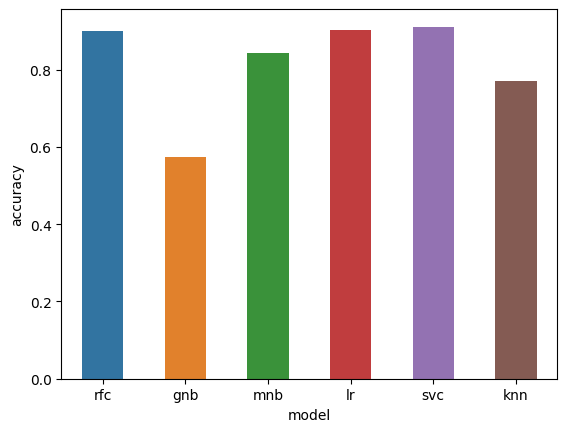

In [99]:
acc = [rfc_acc, gn_acc, mnb_acc, lr_acc, svc_acc, knn_acc]
model =  ['rfc', 'gnb', 'mnb', 'lr', 'svc', 'knn']
model_acc_df = pd.DataFrame({'accuracy': acc, 'model': model})
sns.barplot(model_acc_df, x='model', y='accuracy', width = 0.5)

In [108]:
# Tuning SVC model using GridSeachCV

param_grid = {'C': [0.4, 10],
              #'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'poly', 'rbf']}

svc_grid = GridSearchCV(svc, param_grid, refit = True, cv = 2, verbose = 2)
svc_grid.fit(x_train, y_train)

print("best parameters of svc : " ,svc_grid.best_params_)
best_svc_grid = svc_grid.best_estimator_
y_pred = best_svc_grid.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ...............................C=0.4, kernel=linear; total time= 2.3min
[CV] END ...............................C=0.4, kernel=linear; total time= 2.3min
[CV] END .................................C=0.4, kernel=poly; total time= 4.4min
[CV] END .................................C=0.4, kernel=poly; total time= 4.5min
[CV] END ..................................C=0.4, kernel=rbf; total time= 4.6min
[CV] END ..................................C=0.4, kernel=rbf; total time= 4.6min
[CV] END ................................C=10, kernel=linear; total time= 1.7min
[CV] END ................................C=10, kernel=linear; total time= 1.7min
[CV] END ..................................C=10, kernel=poly; total time= 4.6min
[CV] END ..................................C=10, kernel=poly; total time= 4.6min
[CV] END ...................................C=10, kernel=rbf; total time= 5.2min
[CV] END ...................................C=10,

In [105]:
# Tuning Multinomial Naivebayes model using GridSeachCV

from sklearn.model_selection import GridSearchCV
parameters = {
'alpha': [3,2.5,2,1.5,1.3,1.2, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}
grid_search= GridSearchCV(mnb_model, parameters, refit = True, verbose = 1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

best_mnb = grid_search.best_estimator_

y_pred = best_mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8945
[[ 318  157]
 [  54 1471]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       475
           1       0.90      0.96      0.93      1525

    accuracy                           0.89      2000
   macro avg       0.88      0.82      0.84      2000
weighted avg       0.89      0.89      0.89      2000

